In [1]:
%%time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from emnist import extract_training_samples
from emnist import extract_test_samples
from keras.utils import np_utils
from matplotlib import pyplot
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import plot_model, to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import time
import os


CPU times: user 2.92 s, sys: 3.99 s, total: 6.91 s
Wall time: 2.26 s


In [69]:

from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

## Global parameters, data formating and optimiser implimentations

- image augmentation
- early stopping 

In [4]:
#Global para's

img_width, img_height = 28, 28
leaky_relu_alpha = 0.1

In [5]:
X_train, y_train = extract_training_samples('letters')
X_test, y_test = extract_test_samples('letters')

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124800, 28, 28)
(20800, 28, 28)
(124800,)
(20800,)


In [7]:
num_pixels = X_train.shape[1] * X_train.shape[2]

In [8]:
if K.image_data_format() == 'channels_first':
    X_trainCNN = X_train.reshape(X_train.shape[0], 1, img_width, img_height)
    X_testCNN = X_test.reshape(X_test.shape[0], 1, img_width, img_height)
    CNNinput_shape = (1, img_width, img_height)
else:
    X_trainCNN = X_train.reshape(X_train.shape[0], img_width, img_height, 1)
    X_testCNN = X_test.reshape(X_test.shape[0], img_width, img_height, 1)
    CNNinput_shape = (img_width, img_height, 1)

In [9]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


In [ ]:
img_gen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False)

In [ ]:
if not os.path.isdir("models"):
    os.makedirs("models")
    
filepath="models/weights_3conv_%s.hdf5" % time.strftime("%d%m%Y")

checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode="max")
# create an Early Stopping callback
early_stopping = EarlyStopping(patience=15)

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

## Modeling Phase

In [12]:
def conv_model(stride = 3, pool_size = 2):
    
    """
    CNN Keras model with 6 convolutions.

    """

            
    model = Sequential()
    
    model.add(Conv2D(16, (stride, stride), padding='same', input_shape=CNNinput_shape))
    model.add(Activation('relu'))
    
    model.add(Conv2D(16, (stride, stride)))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (stride, stride), padding='same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(32, (stride, stride), padding='same'))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model
    
'''    model.add(Conv2D(128, (stride, stride), padding='same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (stride, stride), padding='same'))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(0.25))'''
    
    
'''    model.add(Flatten())
    model.add(Dense(128))
    
    model.add(Activation('relu'))
    model.add(Dropout(0.2))'''



"    model.add(Flatten())\n    model.add(Dense(128))\n    \n    model.add(Activation('relu'))\n    model.add(Dropout(0.2))"

In [18]:
cnn_model = conv_model()
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        2320      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        4

In [30]:
%%time

cnn_model = conv_model()
cnn_model.summary()

CNNHistory = cnn_model.fit(img_gen.flow(X_trainCNN, y_train), validation_data=(X_testCNN, y_test), epochs=10, 
                        batch_size = 200, verbose=2)

CNN_scores = cnn_model.evaluate(X_testCNN, y_test, verbose=0)

print("Baseline Error: %.2f%%" % (100-CNN_scores[1]*100))
print(f'Test loss for base CNN: {CNN_scores[0]} / Test accuracy: {CNN_scores[1]}')

Epoch 1/10
3900/3900 - 36s - loss: 0.2446 - accuracy: 0.9180 - val_loss: 0.2007 - val_accuracy: 0.9349
Epoch 2/10
3900/3900 - 35s - loss: 0.2395 - accuracy: 0.9195 - val_loss: 0.2058 - val_accuracy: 0.9332
Epoch 3/10
3900/3900 - 36s - loss: 0.2374 - accuracy: 0.9198 - val_loss: 0.1993 - val_accuracy: 0.9335
Epoch 4/10
3900/3900 - 35s - loss: 0.2326 - accuracy: 0.9222 - val_loss: 0.2126 - val_accuracy: 0.9305
Epoch 5/10
3900/3900 - 36s - loss: 0.2298 - accuracy: 0.9229 - val_loss: 0.1946 - val_accuracy: 0.9361
Epoch 6/10
3900/3900 - 36s - loss: 0.2247 - accuracy: 0.9245 - val_loss: 0.1990 - val_accuracy: 0.9343
Epoch 7/10
3900/3900 - 36s - loss: 0.2242 - accuracy: 0.9233 - val_loss: 0.2127 - val_accuracy: 0.9325
Epoch 8/10
3900/3900 - 35s - loss: 0.2242 - accuracy: 0.9250 - val_loss: 0.2064 - val_accuracy: 0.9313
Epoch 9/10
3900/3900 - 36s - loss: 0.2202 - accuracy: 0.9251 - val_loss: 0.1924 - val_accuracy: 0.9365
Epoch 10/10
3900/3900 - 36s - loss: 0.2198 - accuracy: 0.9254 - val_loss:

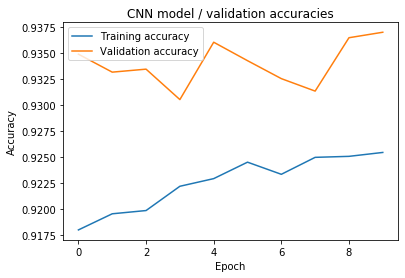

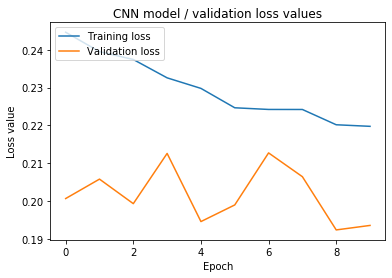

In [31]:
plt.plot(CNNHistory.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory.history['loss'], label='Training loss')
plt.plot(CNNHistory.history['val_loss'], label='Validation loss')
plt.title('CNN model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [46]:
def conv_model2(stride = 3, pool_size = 2):

            
    model = Sequential()
    
    model.add(Conv2D(16, (stride, stride), padding='same', input_shape=CNNinput_shape))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(Dropout(0.2))

              
    model.add(Conv2D(32, (stride, stride)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(Dropout(0.2))
    
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    
    model.add(Conv2D(32, (stride, stride), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(Dropout(0.2))
              
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    
    model.add(Flatten())
    
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [47]:
cnn_model2 = conv_model2()
cnn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 26, 26, 32)       

In [48]:
%%time


CNNHistory2 = cnn_model2.fit(img_gen.flow(X_trainCNN, y_train), validation_data=(X_testCNN, y_test), epochs=20, 
                        batch_size = 200, verbose=2)

CNN_scores2 = cnn_model2.evaluate(X_testCNN, y_test, verbose=0)

print("Baseline Error: %.2f%%" % (100-CNN_scores2[1]*100))
print(f'Test loss for base CNN: {CNN_scores2[0]} / Test accuracy: {CNN_scores2[1]}')

Epoch 1/20
3900/3900 - 73s - loss: 0.6289 - accuracy: 0.8042 - val_loss: 0.3330 - val_accuracy: 0.8963
Epoch 2/20
3900/3900 - 73s - loss: 0.3357 - accuracy: 0.8898 - val_loss: 0.3128 - val_accuracy: 0.8970
Epoch 3/20
3900/3900 - 72s - loss: 0.2860 - accuracy: 0.9052 - val_loss: 0.2664 - val_accuracy: 0.9135
Epoch 4/20
3900/3900 - 72s - loss: 0.2601 - accuracy: 0.9127 - val_loss: 0.2539 - val_accuracy: 0.9184
Epoch 5/20
3900/3900 - 72s - loss: 0.2433 - accuracy: 0.9182 - val_loss: 0.2532 - val_accuracy: 0.9185
Epoch 6/20
3900/3900 - 73s - loss: 0.2328 - accuracy: 0.9212 - val_loss: 0.2418 - val_accuracy: 0.9192
Epoch 7/20
3900/3900 - 73s - loss: 0.2242 - accuracy: 0.9244 - val_loss: 0.2178 - val_accuracy: 0.9265
Epoch 8/20
3900/3900 - 73s - loss: 0.2172 - accuracy: 0.9267 - val_loss: 0.2184 - val_accuracy: 0.9279
Epoch 9/20
3900/3900 - 72s - loss: 0.2142 - accuracy: 0.9275 - val_loss: 0.2122 - val_accuracy: 0.9285
Epoch 10/20
3900/3900 - 73s - loss: 0.2081 - accuracy: 0.9295 - val_loss:

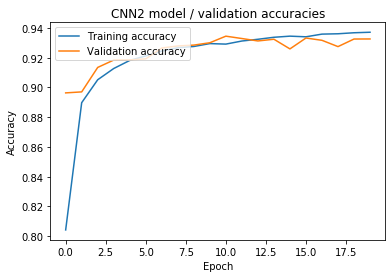

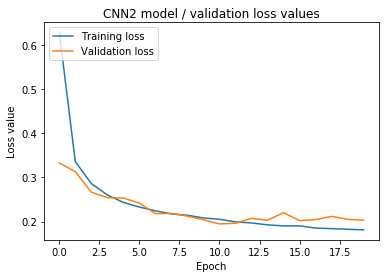

In [49]:
plt.plot(CNNHistory2.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory2.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN2 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory2.history['loss'], label='Training loss')
plt.plot(CNNHistory2.history['val_loss'], label='Validation loss')
plt.title('CNN2 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [62]:
def conv_model3():

    
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = CNNinput_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
               
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [63]:
cnn_model3 = conv_model3()
cnn_model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_5 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)       

In [64]:
%%time

CNNHistory3 = cnn_model3.fit(img_gen.flow(X_trainCNN, y_train), validation_data=(X_testCNN, y_test), epochs=20, 
                        batch_size = 500, verbose=2)

CNN_scores3 = cnn_model3.evaluate(X_testCNN, y_test, verbose=0)

print("Baseline Error: %.2f%%" % (100-CNN_scores3[1]*100))
print(f'Test loss for base CNN: {CNN_scores3[0]} / Test accuracy: {CNN_scores3[1]}')

Epoch 1/20
3900/3900 - 107s - loss: 0.7163 - accuracy: 0.7810 - val_loss: 0.2449 - val_accuracy: 0.9180
Epoch 2/20
3900/3900 - 111s - loss: 0.3794 - accuracy: 0.8776 - val_loss: 0.2043 - val_accuracy: 0.9300
Epoch 3/20
3900/3900 - 112s - loss: 0.3217 - accuracy: 0.8951 - val_loss: 0.1980 - val_accuracy: 0.9333
Epoch 4/20
3900/3900 - 108s - loss: 0.2937 - accuracy: 0.9044 - val_loss: 0.1877 - val_accuracy: 0.9381
Epoch 5/20
3900/3900 - 110s - loss: 0.2693 - accuracy: 0.9106 - val_loss: 0.1775 - val_accuracy: 0.9379
Epoch 6/20
3900/3900 - 111s - loss: 0.2565 - accuracy: 0.9156 - val_loss: 0.2017 - val_accuracy: 0.9320
Epoch 7/20
3900/3900 - 110s - loss: 0.2490 - accuracy: 0.9176 - val_loss: 0.1602 - val_accuracy: 0.9456
Epoch 8/20
3900/3900 - 112s - loss: 0.2393 - accuracy: 0.9205 - val_loss: 0.1636 - val_accuracy: 0.9439
Epoch 9/20
3900/3900 - 111s - loss: 0.2339 - accuracy: 0.9222 - val_loss: 0.1665 - val_accuracy: 0.9444
Epoch 10/20
3900/3900 - 110s - loss: 0.2266 - accuracy: 0.9245 -

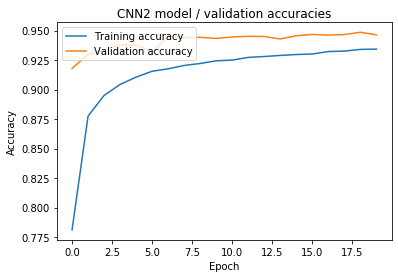

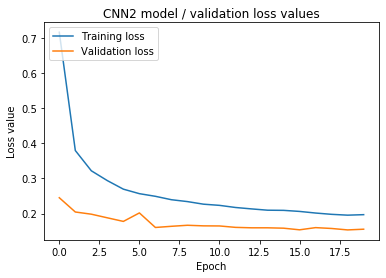

In [65]:
plt.plot(CNNHistory3.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory3.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN2 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory3.history['loss'], label='Training loss')
plt.plot(CNNHistory3.history['val_loss'], label='Validation loss')
plt.title('CNN2 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [77]:
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = conv_model3()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        
        if K.image_data_format() == 'channels_first':
            trainX = trainX.reshape(trainX.shape[0], 1, img_width, img_height)
            testX = testX.reshape(testX.shape[0], 1, img_width, img_height)
            
        else:
            trainX = trainX.reshape(trainX.shape[0], img_width, img_height, 1)
            testX = testX.reshape(testX.shape[0], img_width, img_height, 1)
            
    
        history = model.fit(img_gen.flow(trainX, trainY), validation_data=(testX, testY), epochs=10, 
                        batch_size = 500, verbose=2)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()
    
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

Epoch 1/10
3120/3120 - 86s - loss: 0.7690 - accuracy: 0.7670 - val_loss: 0.3418 - val_accuracy: 0.8889
Epoch 2/10
3120/3120 - 89s - loss: 0.4014 - accuracy: 0.8692 - val_loss: 0.2212 - val_accuracy: 0.9272
Epoch 3/10
3120/3120 - 88s - loss: 0.3365 - accuracy: 0.8903 - val_loss: 0.1933 - val_accuracy: 0.9351
Epoch 4/10
3120/3120 - 86s - loss: 0.3045 - accuracy: 0.9010 - val_loss: 0.1884 - val_accuracy: 0.9382
Epoch 5/10
3120/3120 - 85s - loss: 0.2848 - accuracy: 0.9062 - val_loss: 0.1757 - val_accuracy: 0.9404
Epoch 6/10
3120/3120 - 87s - loss: 0.2728 - accuracy: 0.9102 - val_loss: 0.1756 - val_accuracy: 0.9405
Epoch 7/10
3120/3120 - 88s - loss: 0.2574 - accuracy: 0.9146 - val_loss: 0.1689 - val_accuracy: 0.9425
Epoch 8/10
3120/3120 - 87s - loss: 0.2484 - accuracy: 0.9183 - val_loss: 0.1700 - val_accuracy: 0.9413
Epoch 9/10
3120/3120 - 85s - loss: 0.2397 - accuracy: 0.9204 - val_loss: 0.1693 - val_accuracy: 0.9411
Epoch 10/10
3120/3120 - 98s - loss: 0.2318 - accuracy: 0.9229 - val_loss:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

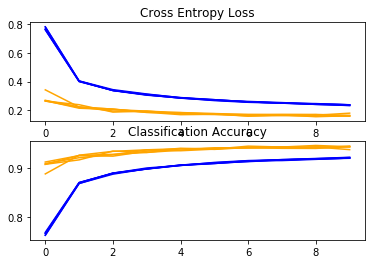

Accuracy: mean=94.358 std=0.259, n=5


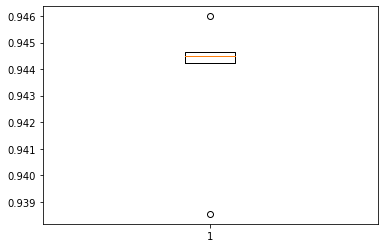

CPU times: user 15h 20min 57s, sys: 1h 45min 32s, total: 17h 6min 29s
Wall time: 1h 25min 27s


In [78]:
%%time

scores, histories = evaluate_model(X_trainCNN, y_train)
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)